<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Optimize Customer Segmentation using ClearScape Analytic Functions and Open-Source LLMs
  <br>
       <img id="teradata-logo" src="../../images/TeradataLogo.png" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>
<hr>

<br>

<b style = 'font-size:24px;font-family:Arial;color:#00233C'>Leverage highly-scalable native processing functions to create ideal customer segments using word embeddings and clustering algorithms</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Vector embedding</b> is a numerical representation of data that captures semantic relationships and similarities, making it possible to perform mathematical operations and comparisons on the data for various tasks like text analysis and recommendation systems.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>K-means clustering</b> is one of the most popular <b>unsupervised</b> machine learning algorithms.  Essentially, the algorithm seeks to group similar data points together by minimizing the average ("means" in K-means) distance for all data points from each cluster's center (centroid).</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Using <b>Teradata Vantage</b> and <b>ClearScape Analytics</b>, we can combine these advanced AI and ML techniques to <b>rapidly</b> find the ideal number of customer segments based on the semantic meaning of their comments history.  This segmentation can be used on its own for marketing and other tasts, or used in further predictive analytics use cases.</p>

<table style = 'width:100%;table-layout:fixed;'>
    <tr>
        <td style = 'vertical-align:top' width = '50%'>
            <ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
                <li>Create a Vector Embedding table using open-source LLMs applied at scale in the database</li>
                <br>
                <li>Rapidly iterate over multiple K-means models, evaluating each</li>
                <br>
                <li>Visualize the experimental results to indicate the best cluster</li>
            </ol>
        </td>
        <td><img src = 'images/comparative_superlative_small.jpg' width = '250'></td>
        <td><img src = 'images/K-means_convergence.gif' width = '250'></td>
    </tr>
</table>

<hr>

In [2]:
%connect lake_user, user=data_scientist

Password: ········


Success: 'lake_user' connection established and activated for user 'data_scientist'


<hr>
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Step 1 - Data Preparation using an LLM to create a Vector Table</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we will inspect the original data set, and use native vector embedding functions to generate features</p>

<ol style = 'font-size:16px;font-family:Arialcolor:#00233C'>
    <li>Inspect the rows of the Customer Comments table</li>
    <li>Inspect the GloVe Model table</li>
    <li>Use TD_WordEmbeddings function to create the vector table</li>
    </ol>
    

<hr>
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>1.1 - Inspect the Data</b>

<p style = 'font-size:16px;font-family:Arialcolor:#00233C'>Display a sample</p>

In [3]:
SELECT * FROM demo_ofs.web_comment
SAMPLE 2;

,comment_id,customer_id,comment_text,comment_summary
1,16953,1183,"This shirt is so soft and buttery! it fits tts and just as shown on the model. for the sale price, this shirt is a gonga! good go-to shirt on those days where you're just not sure what to wear. one thing that slightly bothers me about this shirt is that the arm holes are a bit loose, so you can see your bra. i think if you wear a black bra with it though, it would be fine.",Soft & buttery!
2,3964,1094,"This caught my eye and i tried it on the in the store today (the green). i found it to run a little bit large - i expected the small to fit, but the xs fit me better (better fit in armholes and also less billowy). i really like the way it looks, but ulitimately did not purchase it today. i might reconsider on sale. the flaws (in my opinion) are that it is dry clean only, the skirt is not lined (and should be), and it's a bit overpriced for the quality. but on the other hand, it's very cute and f",Cute and flattering but some flaws


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#00233'>1.2 - Model table</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We format the model table as in the documentation: a column for the token, and a column for each dimension of the vector space. This example uses the GloVe 50-dimensional pre-trained embeddings. We filter out non-ASCII characters to comply with the function's requirements.</p>

In [4]:
SELECT * FROM demo_ofs.glove_6B_50d
SAMPLE 2;

,doc_id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
1,orneriness,-0.30202,-0.64364,0.010434,-0.25141,-0.12369,-0.46633,0.90522,0.28227,0.027677,0.73168,-0.20398,-0.11015,0.13409,-0.28226,-0.51166,-0.3291,-0.15619,-0.14484,0.81158,-0.3252,-0.69653,-0.2477,-0.050966,-0.29896,-0.16134,0.54112,-0.70124,0.53563,1.1713,0.19366,-1.1648,-0.040515,0.45243,-0.22988,0.11823,0.54276,-0.28866,0.42029,-0.56028,0.45282,0.2655,0.22092,-0.1962,0.60572,-0.53599,-0.34969,0.0056389,-0.11653,-0.02756,-0.23504
2,metropolitanate,-0.25558,0.35836,-1.2885,-0.65756,0.11604,-0.0097458,1.3115,0.037913,-0.89017,-0.22405,1.4893,-0.7579,0.086938,0.3261,-0.77208,0.93066,-0.57054,-0.27625,0.67654,-0.068094,-0.20722,-0.61042,-1.463,0.82927,-0.97746,0.72857,-0.37158,0.69593,-0.42403,0.65376,-0.98001,0.00364,0.060261,0.042284,-0.20961,-0.81231,0.29793,-0.32639,-0.68317,0.82476,0.37002,-0.37242,0.21369,0.23434,-0.95033,-0.3329,0.30133,-0.43,-0.10963,-1.0325


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>1.3 - Embeddings</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>TD_WordEmbeddings can perform four operations: token-embedding, doc-embedding, token2token-similarity, and doc2doc-similarity. This notebook shows the first two.  We will use doc-embedding as the basis for our Segmentation.</p>

In [6]:
SELECT TOP 5 * FROM TD_WordEmbeddings (
    ON (SELECT TOP 1 * FROM demo_ofs.web_comment) AS InputTable
    ON demo_ofs.glove_6B_50d AS ModelTable DIMENSION
USING
    IDColumn('comment_id')
    ModelVectorColumns('[1:50]')
    PrimaryColumn('comment_text')
    Operation('token-embedding')
    ModelTextColumn('doc_id')
)AS dt 
ORDER BY comment_id ASC;


,comment_id,TD_Token,TD_TokenCount,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
1,23295,works,1,0.56266,0.59051,-0.72821,-0.65968,0.0804,0.41202,-0.82194,-0.83249,-0.36639,0.60104,0.042207,0.60547,-0.11445,-0.086225,0.12744,-0.78824,0.24082,0.39307,0.22186,-0.32826,1.0595,0.10519,-0.41677,-0.059855,0.43805,-0.82992,-1.2822,-0.61877,-0.32833,-0.50885,3.0525,-0.98247,0.3645,-0.84238,0.036912,0.54804,0.21519,1.078,0.24821,0.59137,0.54625,-0.047358,0.22515,-0.35574,-0.057102,0.32641,-0.2652,-0.22713,-0.27025,0.13165
2,23295,be,1,0.91102,-0.22872,0.2077,-0.20237,0.50697,-0.057893,-0.41729,-0.075341,-0.30454,-0.003286,0.44481,0.41818,-0.33409,0.032917,0.98872,0.91984,0.40521,0.01925,-0.1052,-0.79865,-0.36403,-0.087995,0.72182,0.11114,0.2153,-1.9411,-0.26376,0.4455,0.27586,-0.21104,4.0212,-0.061943,-0.32134,-0.81922,0.2108,-0.20414,0.72625,0.47517,-0.39853,-0.39168,-0.34581,0.025928,0.13072,0.73562,-0.15199,-0.18439,-0.67128,0.16692,-0.050063,0.19241
3,23295,very,1,0.57049,-0.0077854,-0.70766,-0.31785,0.89493,-0.016128,-0.067149,0.15765,-0.49832,0.25845,0.10943,0.36728,-0.14843,0.063286,0.20832,0.4592,0.71781,0.22772,-0.0015349,-0.93093,-0.80048,0.46714,0.41571,0.17572,1.0876,-1.6116,-0.70943,0.83772,0.67081,0.18139,3.9899,-0.1027,0.439,-0.67926,0.11861,-0.20182,-0.081603,0.90739,-0.52258,-0.48426,-0.31326,0.10325,0.13036,0.35115,0.37593,0.064388,-0.2259,0.079125,0.12573,0.83939
4,23295,sizes,1,0.091757,0.96352,0.79818,-0.29092,0.32143,0.91283,0.43096,-1.3222,0.087944,-0.68518,-0.15224,-0.43227,0.58568,0.31981,-0.037635,0.0039938,-0.9413,0.030297,-0.082339,-1.692,-0.1505,-0.92924,0.93013,0.44826,-0.89656,0.46136,-0.96521,0.092864,0.70605,-0.11109,2.1556,0.69884,0.047544,-0.27085,1.0841,0.39874,-0.1751,0.52407,-0.24222,-0.068185,0.15391,-0.33397,1.1982,0.57862,-0.20361,0.65724,1.0831,-0.1446,-0.055229,-0.023523
5,23295,was,3,0.086888,-0.19416,-0.24267,-0.33391,0.56731,0.39783,-0.97809,0.03159,-0.61469,-0.31406,0.56145,0.12886,-0.84193,-0.46992,0.47097,0.023012,-0.59609,0.22291,-1.1614,0.3865,0.067412,0.44883,0.17394,-0.53574,0.17909,-2.1647,-0.12827,0.29036,-0.15061,0.35242,3.124,-0.90085,-0.02567,-0.41709,0.40565,-0.22703,0.76829,0.60982,0.070068,-0.13271,-0.1201,0.096132,-0.43998,-0.48531,-0.5188,-0.3077,-0.75028,-0.77,0.3945,-0.16937


In [7]:
SELECT TOP 2 * FROM TD_WordEmbeddings (
    ON (SELECT TOP 1000 * FROM demo_ofs.web_comment) AS InputTable
    ON demo_ofs.glove_6B_50d AS ModelTable DIMENSION
USING
    IDColumn('comment_id')
    ModelVectorColumns('[1:50]')
    PrimaryColumn('comment_text')
    Operation('doc-embedding')
    ModelTextColumn('doc_id')
    Accumulate('comment_text', 'customer_id')
)AS dt 
ORDER BY comment_id ASC;

,comment_id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,comment_text,customer_id
1,32,0.44821461111111116,-0.03229133333333332,-0.03918305555555555,-0.2736832222222222,0.33443661111111106,0.054000277777777744,-0.3382525611111111,-0.1534522611111111,-0.06988845722222221,-0.08231020555555554,0.11253023888888888,0.1849478888888889,-0.13543044444444446,-0.1596866111111111,0.42850102777777777,0.4657223333333333,0.17045077777777784,0.004805611111111098,-0.14086194444444444,-0.7019466666666667,-0.2201615,0.07575911111111111,0.4799842222222222,0.008728999999999999,0.09900688888888892,-1.428356111111111,-0.4549355555555555,0.32016161111111113,0.45993588888888887,-0.25144666666666676,3.3687222222222224,0.22412627777777783,-0.1089627222222222,-0.3871138888888889,0.1515696738888889,0.06155221666666666,0.10220505555555555,0.2984798444444445,0.008074000000000019,-0.2654152222222222,-0.2399473888888889,-0.008473733333333337,0.18816411111111112,0.4949512222222222,0.0037501666666666595,0.0217247222222222,-0.18444495000000005,-0.0996641111111111,-0.03410205555555555,0.0256334,These pants are even better in person. the only downside is that they need to be dry cleaned.,1060
2,77,0.21918640540540535,-0.024974935135135143,-0.08274802702702698,-0.1571003918918919,0.4191283513513514,0.11838310810810809,-0.4357309729729729,0.013520659459459456,-0.2677451329729729,-0.03174459081081081,0.04301,0.16348781081081082,-0.573060791891892,0.021636298108108125,0.4962245675675676,0.2986793513513514,0.08523249459459457,-0.10486421621621624,-0.3137621729729729,-0.5002808378378378,-0.028565137837837845,0.1628585675675676,0.1395386027027027,-0.07067756756756756,0.29693156756756756,-1.5977700000000001,-0.49039240540540535,0.1980865513513513,0.42821764864864875,-0.37768194594594584,3.122132378378377,0.1854602702702703,-0.2804308648648649,-0.1713193783783784,-0.021409745405405408,-0.023109443243243245,0.16205424324324325,0.24884048648648643,-0.030152105405405406,-0.2862290108108107,-0.11955087567567568,0.021299021621621637,-0.13908337837837836,0.08976250432432435,0.017995297297297288,0.11163648648648647,0.03548127216216215,-0.14022318918918916,-0.12343535135135134,0.07551536216216216,"The zipper broke on this piece the first time i wore it. very disappointing since i love the design. i'm actually going to try to replace the zipper myself with something stronger, but annoying that it's come to that.",850


<hr>
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Step 2 - Find the Ideal K-means Model</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>As discussed above, the K-means algorithm takes a number of clusters "k", chooses a random starting point for each centroid, and iterates until a hard limit or an optimium value is reached.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Other Function Parameters Include (but are not limited to)</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Input dataframe</li>
    <li>StopThreshold - The algorithm converges if the distance between the centroids from the previous iteration and the current iteration is less than the specified value.</li>
    <li>MaxIterNum</li>Specify the maximum number of iterations for the K-means algorithm. The algorithm stops after performing the specified number of iterations even if the convergence criterion is not met.
    </ul>
    
<hr>
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>2.1 - Example Model - 4-cluster test</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The example below uses an arbitrary number of clusters to create the first model.  Note the output metadata provides information such as the number of iterations, converged or not, etc.</p>

In [11]:
WITH doc_embedding AS (
    SELECT * FROM TD_WordEmbeddings (
        ON (SELECT TOP 1000 * FROM demo_ofs.web_comment) AS InputTable
        ON demo_ofs.glove_6B_50d AS ModelTable DIMENSION
    USING
        IDColumn('comment_id')
        ModelVectorColumns('[1:50]')
        PrimaryColumn('comment_text')
        Operation('doc-embedding')
        ModelTextColumn('doc_id')
        Accumulate('comment_text', 'customer_id')
    )AS d 
)

SELECT td_clusterid_kmeans, td_size_kmeans, td_withinss_kmeans, td_modelinfo_kmeans FROM TD_KMeans (
ON doc_embedding AS InputTable 
USING
IdColumn('comment_id') 
TargetColumns('[1:50]') 
NumClusters(4)
StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt;

,td_clusterid_kmeans,td_size_kmeans,td_withinss_kmeans,td_modelinfo_kmeans
1,0,403,114.57849761759098,
2,1,136,82.52648705653155,
3,2,425,121.59156519031967,
4,3,36,0,
5,,,,Converged : True
6,,,,Number of Iterations : 7
7,,,,Number of Clusters : 4
8,,,,Total_WithinSS : 3.18696549864442E+02
9,,,,Between_SS : 5.67695201989296E+02
10,,,,Method for InitialCentroids : Random


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#00233C'>2.2 - Finding an Ideal value for K</b>

<table style = 'width:100%;table-layout:fixed;'>
    <tr>
        <td style = 'vertical-align:top' width = '50%'>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Typically, data scientists will build the model using various values for "k", and plot the "WCSS" (Within Cluster Sum-of-Squares) value on a series of each value chosen for k.  The "elbow" point (where the slope changes) is usually a good value for k.  <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Analytics-Database-Analytic-Functions-17.20/Model-Training-Functions/TD_KMeans'>KMeans</a> function will return this value as "TotalWithinSS : ###" as a row in the "td_modelinfo_kmeans" column.</p>
<br>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the below example, we will express this function using values from 2 to 8 for "k".  Due to the highly-scalable nature of the native training function, we can perform this analysis incredibly rapidly and in parallel.</p>
        </td>
        <td><img src = 'images/WCSS_elbow.png' width = '300'></td>
    </tr>
    </table>

In [81]:
DROP TABLE Embedded_data

Success: 66 rows affected

In [82]:
CREATE MULTISET TABLE Embedded_data AS( 
    SELECT d.* FROM TD_WordEmbeddings (
        ON (SELECT TOP 1000 * FROM demo_ofs.web_comment) AS InputTable
        ON demo_ofs.glove_6B_50d AS ModelTable DIMENSION
    USING
        IDColumn('comment_id')
        ModelVectorColumns('[1:50]')
        PrimaryColumn('comment_text')
        Operation('doc-embedding')
        ModelTextColumn('doc_id')
        Accumulate('comment_text', 'customer_id')
    )AS d 
)WITH DATA
NO PRIMARY INDEX;

Success: 0 rows affected

In [79]:
SELECT '2' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(2)
    StopThreshold(0.0295) 
    MaxIterNum(10)
)AS dt

UNION ALL

SELECT '3' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(3)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

UNION ALL

SELECT '4' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(4)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

UNION ALL

SELECT '5' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(5)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

UNION ALL

SELECT '6' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(6)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

UNION ALL

SELECT '7' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(7)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

UNION ALL

SELECT '8' as K, SUM(td_withinss_kmeans) as SUM_WITHINSS FROM TD_KMeans (
    ON Embedded_data AS InputTable 
USING
    IdColumn('comment_id') 
    TargetColumns('[1:50]') 
    NumClusters(8)
    StopThreshold(0.0295) 
MaxIterNum(10)
)AS dt

,K,SUM_WITHINSS
1,2,407.22345281661546
2,3,349.9320574189587
3,4,325.0449837600645
4,5,310.8696628067755
5,6,302.82915273665503
6,7,292.45411171676915
7,8,289.91712339234675


<hr>
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Step 3 - Find the ideal number of Customer Segments</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>A simple plot will show the "elbow" point indicating an ideal number of clusters or segments.</p>

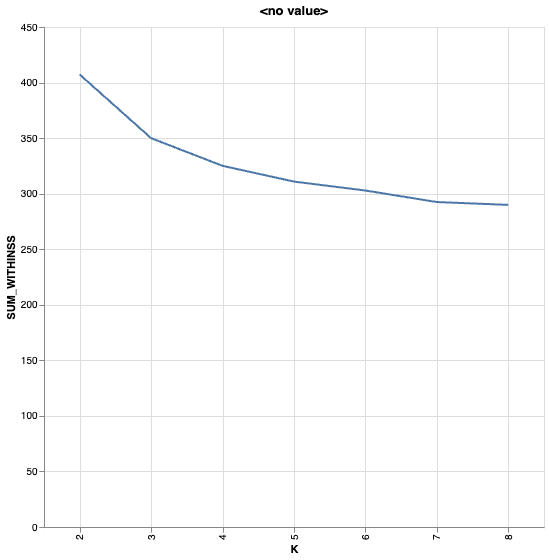

In [80]:
%chart x=K, y=SUM_WITHINSS, mark=line, height=500, width=500

<hr>
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Conclusion</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From our simple demonstration above, we can see how data practitioners can rapidly derive powerful and unique predictive features by combining the latest AI with traditional Machine Learning <b>at scale</b>.  Furthermore, we can easily operationalize this process by combining this vector embedding and segmentation into traditional Customer 360, analytics, or additional predicitve modeling tasks - all on the same platform.</p>

<hr>
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Cleanup</b></p>

In [ ]:
db_drop_table('comments_embedded')
remove_context()